In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#
# Visualize the 1D position of walkers as a function of time
#
numberOfWalkers=10000
numberOfHops=1000
#
# Generate numberOfWalkers random 1D walks
#
xPos=np.zeros((numberOfWalkers,numberOfHops))
time=np.zeros((numberOfWalkers,numberOfHops))
for n in range(numberOfWalkers):
    for t in range(1,numberOfHops):
        xPos[n,t]=xPos[n,t-1]+np.random.normal()
        time[n,t]=time[n,t-1]+np.random.exponential()
#
# Calculate mean-square displacement as a function of t
#
msd=np.zeros(numberOfHops)
meantime=np.zeros(numberOfHops)
for t in range(1,numberOfHops):
    msd[t]=np.var(xPos[:,t])
    meantime[t]=np.mean(time[:,t])

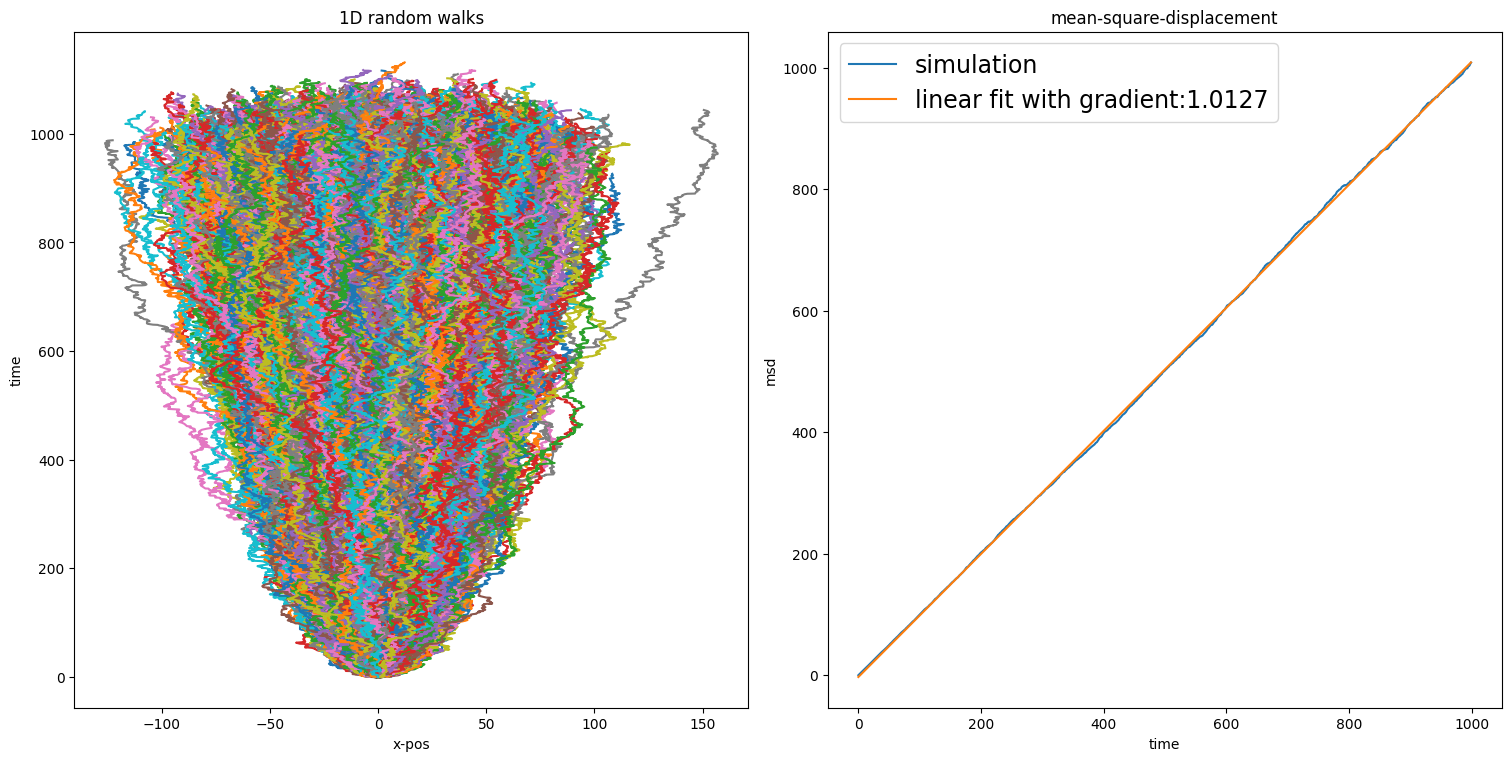

In [3]:
#
# Plot data
#
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)
panel00 = fig.add_subplot(gs[0,0])
panel01 = fig.add_subplot(gs[0,1])

panel00.set_title(r'1D random walks')
panel00.set_xlabel(r'x-pos')
panel00.set_ylabel(r'time')
for n in range(numberOfWalkers):
    panel00.plot(xPos[n],time[n])

panel01.set_title(r'mean-square-displacement')
panel01.set_xlabel(r'time')
panel01.set_ylabel(r'msd')
panel01.plot(meantime,msd,label='simulation')
m,b=np.polyfit(meantime,msd,1)
diffusionConstant=m/2.0
panel01.plot([x for x in range(numberOfHops)],[x*m+b for x in range(numberOfHops)],label='linear fit with gradient:'+str(round(m,4)))
handles, labels = panel01.get_legend_handles_labels()
panel01.legend(handles, labels,fontsize=17,loc='upper left')

fig.set_figheight(7.5)
fig.set_figwidth(15)
plt.show()

In [4]:
#
# Construct regular grid of N(x,t)
#
minXPos=np.min(xPos)
maxXPos=np.max(xPos)
minTime=np.min(time)
maxTime=np.max(time)
gridNumberTime=20
gridNumberXPos=20
deltaXPos=(maxXPos-minXPos)/float(gridNumberXPos)
deltaTime=(maxTime-minTime)/float(gridNumberTime)
numberGrid=np.zeros((gridNumberTime+1,gridNumberXPos+1))
for n in range(numberOfWalkers):
    for t in range(1,numberOfHops):
        iTime=round((time[n,t]-minTime)/deltaTime)
        iXPos=round((xPos[n,t]-minXPos)/deltaXPos)
        numberGrid[iTime,iXPos]+=1.0        
#
# Calculate local concentration gradient and local flux
#
jList=[]
dCList=[]
for iXPos in range(1,gridNumberXPos):
    for iTime in range(1,gridNumberTime):
        j=(numberGrid[iTime+1,iXPos]-numberGrid[iTime-1,iXPos])/(2.0*deltaTime)
        dN_dx=(numberGrid[iTime,iXPos+1]-numberGrid[iTime,iXPos-1])/(2.0*deltaXPos)
        if dN_dx<0.0:
            jList.append(-j)
        else:
            jList.append(j)
        dCList.append(dN_dx/deltaXPos)

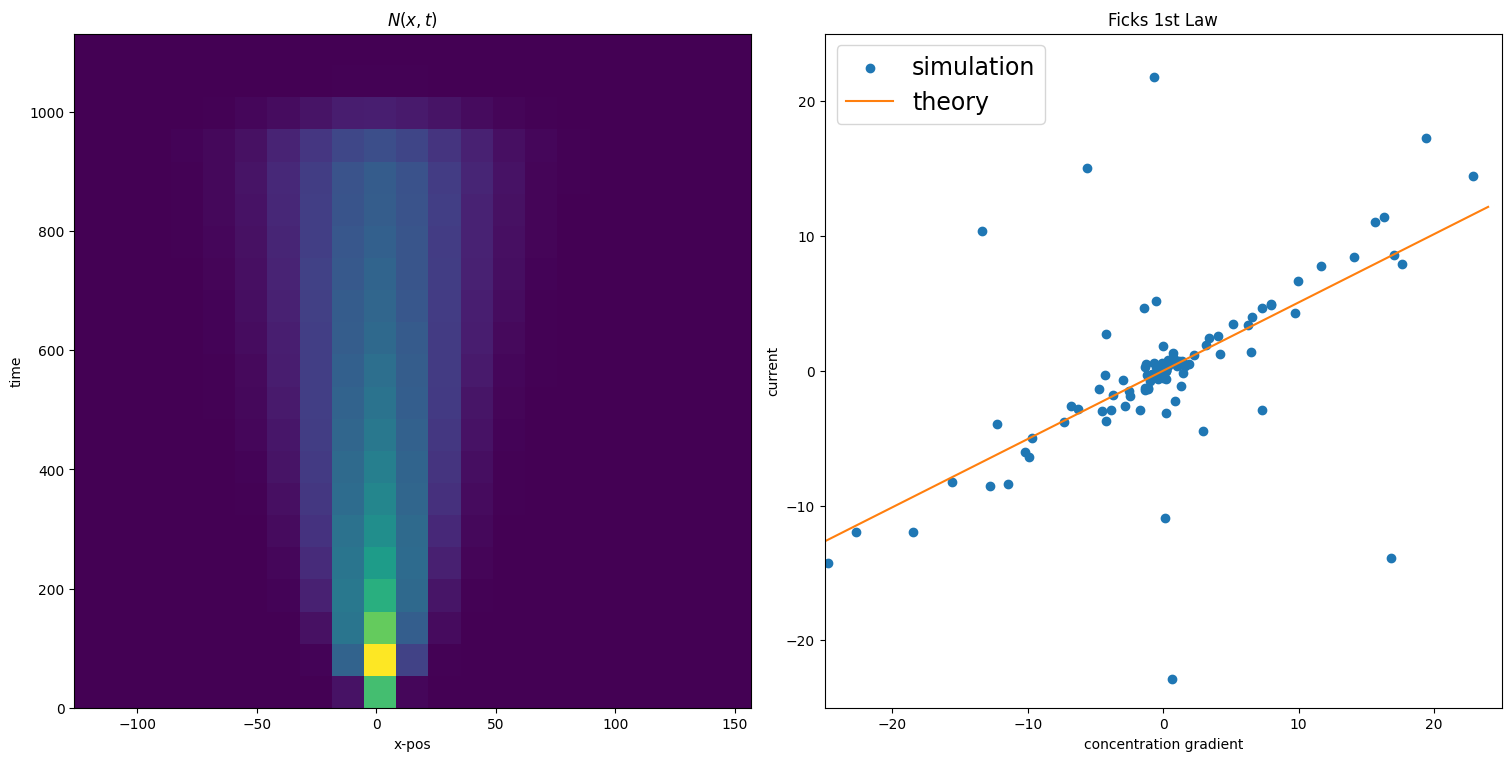

In [5]:
#
# Plot data
#
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(1,2)
panel00 = fig.add_subplot(gs[0,0])
panel01 = fig.add_subplot(gs[0,1])

panel00.set_title(r'$N(x,t)$')
panel00.set_xlabel(r'x-pos')
panel00.set_ylabel(r'time')
panel00.imshow(numberGrid,extent=(minXPos,maxXPos,minTime,maxTime),aspect='auto',origin='lower')                


xrange=25.0
yrange=25.0
panel01.set_title(r'Ficks 1st Law')
panel01.set_xlabel(r'concentration gradient')
panel01.set_ylabel(r'current')
panel01.set_xlim([-xrange,xrange])
panel01.set_ylim([-yrange,xrange])
panel01.scatter(dCList,jList,label='simulation')
panel01.plot([x for x in np.arange(-xrange,yrange,1.0)],[x*diffusionConstant for x in np.arange(-xrange,xrange,1.0)],color='C1',label='theory')
handles, labels = panel01.get_legend_handles_labels()
panel01.legend(handles, labels,fontsize=17,loc='upper left')

fig.set_figheight(7.5)
fig.set_figwidth(15)
plt.show()